# Titanic Data : Logistic Regression

## Description
One of the classic public datasets used to demonstrate binary classification is the Titanic dataset, which lists 891 of the the passengers aboard the RMS Titanic when it sank on April 15, 1912. The dataset includes the name of each passenger as well as other information such as the fare class, the fare price, the person's age and gender, and whether that person survived the sinking of the ship. In this example, we will build a **Logistic Regression** model that predicts whether a passenger will survive.

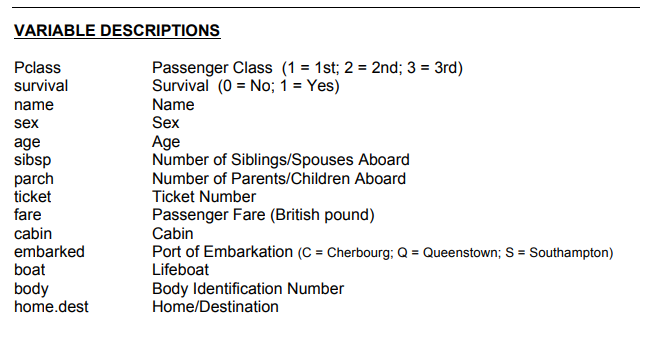

### Import Necessary Libraries

In [29]:
# Data manipulation libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

## Step 1: Load the Dataset

In [32]:
df_titanic = pd.read_csv('Titanic_Dataset.csv')

In [33]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Step 2: Exploratort Data Analysis (EDA)

In [35]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Identify the missing value

In [38]:
df_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Percentage of missing data

In [40]:
df_titanic.isna().sum()/len(df_titanic)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

**Takeway from training dataset: Three columns `Age`, `Cabin`, `Embarked` have missing values**

### `Tasks`

1. Drop the `cabin` column from the data as it has 77% missing data
2. Impute `Age` with the average age per `Pclass`
3. Impute `Embarked` with the mode

4. Detailed `EDA on different variables` to understand their relationship

#### Drop the column `Cabin`

In [45]:
df_titanic.drop('Cabin', axis=1, inplace=True)

In [46]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

### Let us also drop `PassengerId` `Name`, `Fare` and `Ticket`

In [48]:
df_titanic.drop(['PassengerId','Ticket','Name','Fare'],axis=1, inplace=True)

In [49]:
df_titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')

### Handling the age column - missing records

#### - Impute the ages with the average per Pclass

In [52]:
def impute_age(col):
    Age = col[0] #to select the column for imputation
    Pclass = col[1]
    if pd.isnull(Age):
        return (df_titanic[df_titanic['Pclass']==Pclass]['Age'].mean())
    else:
        return Age

In [53]:
df_titanic_sub = df_titanic[['Age', 'Pclass']]

In [54]:
df_titanic_sub

,Age,Pclass
0,22.0,3
1,38.0,1
2,26.0,3
3,35.0,1
4,35.0,3
...,...,...
886,27.0,2
887,19.0,1
888,NaN,3
889,26.0,1


In [55]:
df_titanic_sub.iloc[0]

Age       22.0
Pclass     3.0
Name: 0, dtype: float64

### Imputed missing records in Age as per Pclass

In [57]:
df_titanic['Age'] = df_titanic[['Age', 'Pclass']].apply(impute_age, axis=1)

In [58]:
df_titanic.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    2
dtype: int64

In [59]:
df_titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.00000,1,0,S
1,1,1,female,38.00000,1,0,C
2,1,3,female,26.00000,0,0,S
3,1,1,female,35.00000,1,0,S
4,0,3,male,35.00000,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.00000,0,0,S
887,1,1,female,19.00000,0,0,S
888,0,3,female,25.14062,1,2,S
889,1,1,male,26.00000,0,0,C


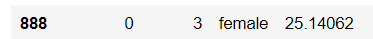

In [61]:
df_titanic_sub[df_titanic_sub['Pclass']==3]['Age'].mean()

25.14061971830986

### Distribution of  age by Pclass

In [82]:
sel_pclass = df_titanic_sub['Pclass']==1

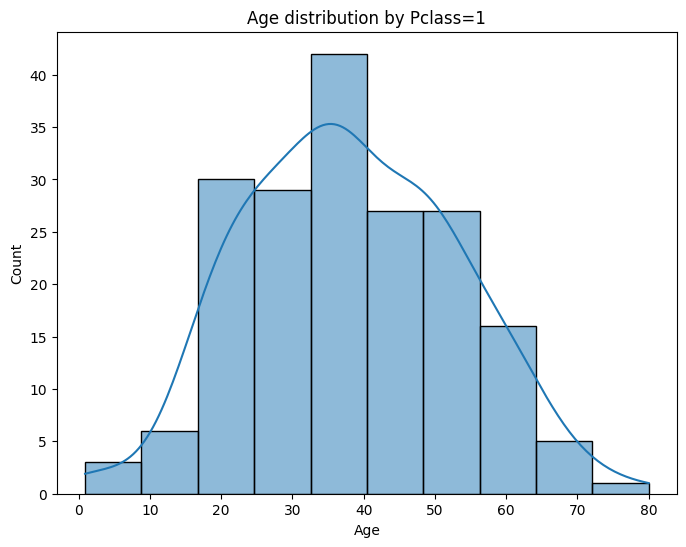

In [84]:
plt.subplots(figsize = (8,6))
sns.histplot(df_titanic_sub[sel_pclass]['Age'], bins=10, kde=True)
plt.title('Age distribution by Pclass=1')
plt.show()

In [86]:
sel_pclass = df_titanic_sub['Pclass']==2

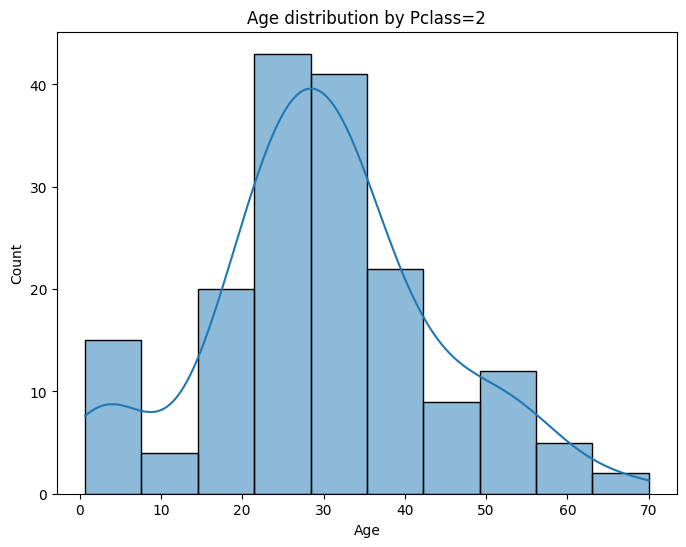

In [88]:
plt.subplots(figsize = (8,6))
sns.histplot(df_titanic_sub[sel_pclass]['Age'], bins=10, kde=True)
plt.title('Age distribution by Pclass=2')
plt.show()

In [90]:
sel_pclass = df_titanic_sub['Pclass']==3

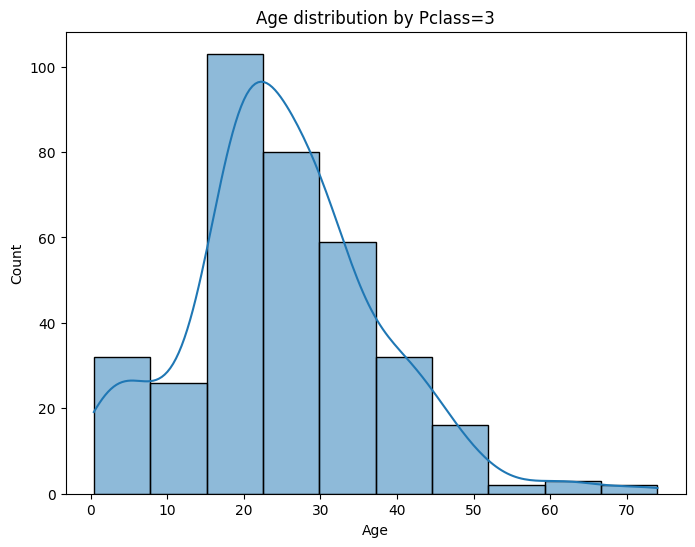

In [92]:
plt.subplots(figsize = (8,6))
sns.histplot(df_titanic_sub[sel_pclass]['Age'], bins=10,kde=True)
plt.title('Age distribution by Pclass=3')
plt.show()

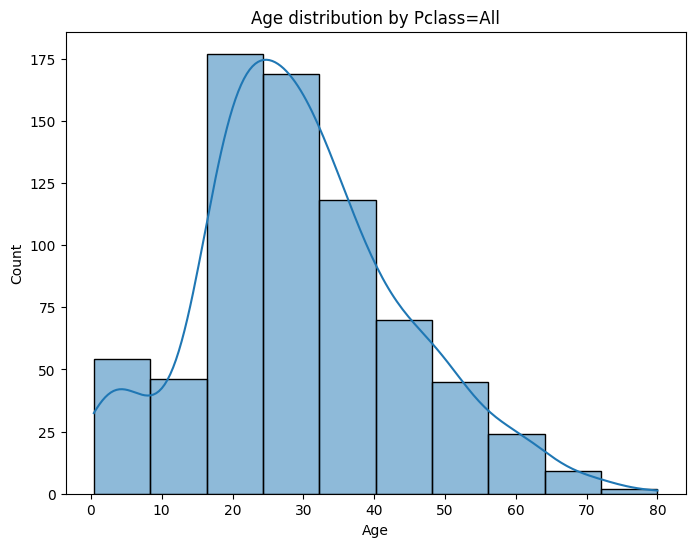

In [94]:
plt.subplots(figsize = (8,6))
sns.histplot(df_titanic_sub['Age'], bins=10, kde=True)
plt.title('Age distribution by Pclass=All')
plt.show()

### Handling the Embarked column

- There are just `two` missing records, we will impute it with the `mode` of the embarked column

In [98]:
df_titanic['Embarked'].fillna(df_titanic["Embarked"].mode()[0], inplace=True)

In [100]:
df_titanic.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [102]:
df_titanic.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
599,1,1,male,49.0,1,0,C
143,0,3,male,19.0,0,0,Q
381,1,3,female,1.0,0,2,C
786,1,3,female,18.0,0,0,S
719,0,3,male,33.0,0,0,S


In [104]:
df_titanic['Embarked'].mode()[0]

'S'

In [106]:
df_titanic[df_titanic['Embarked']=="Q"]

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
5,0,3,male,25.14062,0,0,Q
16,0,3,male,2.00000,4,1,Q
22,1,3,female,15.00000,0,0,Q
28,1,3,female,25.14062,0,0,Q
32,1,3,female,25.14062,0,0,Q
...,...,...,...,...,...,...,...
790,0,3,male,25.14062,0,0,Q
825,0,3,male,25.14062,0,0,Q
828,1,3,male,25.14062,0,0,Q
885,0,3,female,39.00000,0,5,Q


In [108]:
df_titanic[df_titanic['Embarked']=="C"]

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
1,1,1,female,38.00000,1,0,C
9,1,2,female,14.00000,1,0,C
19,1,3,female,25.14062,0,0,C
26,0,3,male,25.14062,0,0,C
30,0,1,male,40.00000,0,0,C
...,...,...,...,...,...,...,...
866,1,2,female,27.00000,1,0,C
874,1,2,female,28.00000,1,0,C
875,1,3,female,15.00000,0,0,C
879,1,1,female,56.00000,0,1,C


### Examine the distribution of `Target` column - Survived

#### Plot the count of survived wrt `sex`

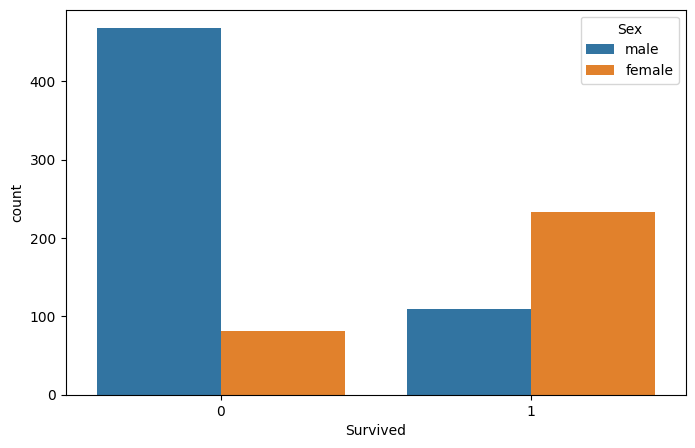

In [56]:
plt.subplots(figsize=(8,5))
sns.countplot(x='Survived', hue='Sex', data=df_titanic)
plt.show()

#### Observation: `sex` is one of the key variables for the survival

#### Plot the count of survived wrt `PClass`

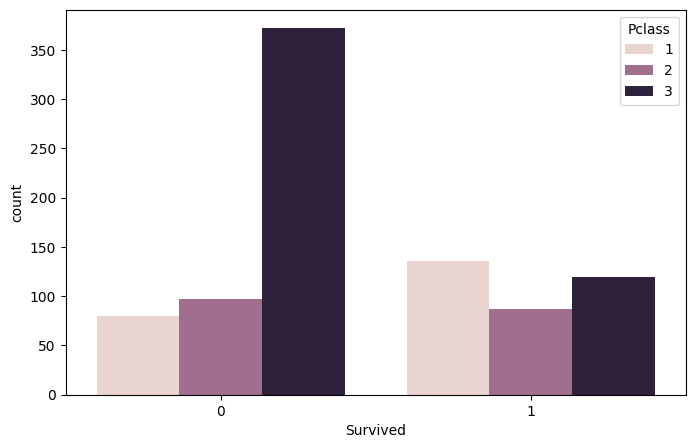

In [114]:
plt.subplots(figsize=(8,5))
sns.countplot(x='Survived', hue='Pclass', data=df_titanic)
plt.show()

#### Observation: `Pclass` is the another key variables for the survival

In [117]:
df_titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')

### Summary table to show #count (number) of survived or died by Pclass --> Sex 

In [121]:
df_titanic.groupby(['Survived', 'Pclass', 'Sex']).agg(Total_count = ('Pclass', 'count')).reset_index()

,Survived,Pclass,Sex,Total_count
0,0,1,female,3
1,0,1,male,77
2,0,2,female,6
3,0,2,male,91
4,0,3,female,72
5,0,3,male,300
6,1,1,female,91
7,1,1,male,45
8,1,2,female,70
9,1,2,male,17


In [123]:
df_titanic.groupby([ 'Pclass', 'Sex']).agg(
Total_count = ('Pclass', 'count')).reset_index()

,Pclass,Sex,Total_count
0,1,female,94
1,1,male,122
2,2,female,76
3,2,male,108
4,3,female,144
5,3,male,347


### Observations
Based on the analysis, the survival count varies significantly by Pclass and Sex:
- Females in 1st and 2nd class had higher survival rates compared to males in the same classes.
- The majority of 3rd-class males did not survive, reflecting class and gender disparities in survival.
- Overall, females in all classes had a survival advantage, while 3rd-class males had the highest fatality count.

### Encoding Categorical Variables

- It is the process of converting `categorical data` (represents categories/labels) into a `numerical format` that can be used in ML algorithms.

- **Label Encoding**: Assign a unique numerical label to each category. Order of the labels may be arbitrary.

    `Example: Category A--> 0, B---> 1, C-->2`
    
- **One Hot Encoding**: Creates binary columns for each category. Leads to `high dimensional feature space`.


In [127]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


- We have categorical variables such as `Sex`, `Embarked` and `Pclass`

### One-Hot Encoding

In [131]:
def create_encoding(df, col_name):
    dummies = pd.get_dummies(df[col_name], prefix=col_name)
    df=pd.concat([df, dummies], axis=1)
    return df

In [133]:
df_titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')

In [135]:
df_titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')

In [137]:
df_titanic_final = df_titanic
df_titanic_final

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.00000,1,0,S
1,1,1,female,38.00000,1,0,C
2,1,3,female,26.00000,0,0,S
3,1,1,female,35.00000,1,0,S
4,0,3,male,35.00000,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.00000,0,0,S
887,1,1,female,19.00000,0,0,S
888,0,3,female,25.14062,1,2,S
889,1,1,male,26.00000,0,0,C


In [139]:
for col in ['Pclass', 'Sex', 'Embarked']:
    df_titanic_final = create_encoding(df_titanic_final,col)

In [141]:
df_titanic.sample(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
845,0,3,male,42.0,0,0,S
842,1,1,female,30.0,0,0,C


In [143]:
df_titanic_final.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
443,1,2,female,28.0,0,0,S,False,True,False,True,False,False,False,True
340,1,2,male,2.0,1,1,S,False,True,False,False,True,False,False,True
402,0,3,female,21.0,1,0,S,False,False,True,True,False,False,False,True
833,0,3,male,23.0,0,0,S,False,False,True,False,True,False,False,True
890,0,3,male,32.0,0,0,Q,False,False,True,False,True,False,True,False


In [145]:
df_titanic_final.drop(['Pclass', 'Sex', 'Embarked'], axis=1, inplace=True)

In [147]:
df_titanic_final

,Survived,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.00000,1,0,False,False,True,False,True,False,False,True
1,1,38.00000,1,0,True,False,False,True,False,True,False,False
2,1,26.00000,0,0,False,False,True,True,False,False,False,True
3,1,35.00000,1,0,True,False,False,True,False,False,False,True
4,0,35.00000,0,0,False,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.00000,0,0,False,True,False,False,True,False,False,True
887,1,19.00000,0,0,True,False,False,True,False,False,False,True
888,0,25.14062,1,2,False,False,True,True,False,False,False,True
889,1,26.00000,0,0,True,False,False,False,True,True,False,False


In [149]:
df_titanic_final = df_titanic_final.astype(int)

In [151]:
df_titanic_final

,Survived,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22,1,0,0,0,1,0,1,0,0,1
1,1,38,1,0,1,0,0,1,0,1,0,0
2,1,26,0,0,0,0,1,1,0,0,0,1
3,1,35,1,0,1,0,0,1,0,0,0,1
4,0,35,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27,0,0,0,1,0,0,1,0,0,1
887,1,19,0,0,1,0,0,1,0,0,0,1
888,0,25,1,2,0,0,1,1,0,0,0,1
889,1,26,0,0,1,0,0,0,1,1,0,0


## Step 3: Model Building

In [230]:
# Machine Learning Libraries
from sklearn.model_selection import train_test_split #train_test split
from sklearn.linear_model import LogisticRegression #to call the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, classification_report

### Prepare the Data

In [154]:
df_titanic_final.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [158]:
input_vars = ['Age', 'SibSp', 'Parch', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

In [160]:
X = df_titanic_final[input_vars]

In [162]:
X.sample(2)

,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
133,29,1,0,0,1,0,1,0,0,0,1
561,40,0,0,0,0,1,0,1,0,0,1


In [164]:
y = df_titanic_final['Survived']

In [166]:
y.sample(2)

618    1
312    0
Name: Survived, dtype: int32

### Split the data into train and test sets

In [168]:
train_X, val_X, train_y, val_y = train_test_split(X,y, test_size=.20, random_state=45)

In [170]:
train_X.shape, val_X.shape

((712, 11), (179, 11))

In [172]:
len(X)

891

In [174]:
712/891*100

79.91021324354658

### Training the model

In [177]:
log_reg_model_1 = LogisticRegression() #creating the model object

In [179]:
log_reg_model_1

LogisticRegression()

In [181]:
log_reg_model_1.fit(train_X, train_y)

LogisticRegression()

## Step 4: Evaluating the Model

In [236]:
pred_values = log_reg_model_1.predict(val_X) #test/validation set

In [238]:
pred_values #predicted values for survival for validation set

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0])

## Calculate performance metrics of the model

### Accuracy

In [242]:
acc = accuracy_score(val_y, pred_values)

In [244]:
print('Accuracy of the model is:', acc*100)

Accuracy of the model is: 84.35754189944134


### Plot the confusion matrix using heatmap

In [248]:
cm = confusion_matrix(val_y, pred_values) #predicted vs actual

In [250]:
cm

array([[102,  15],
       [ 13,  49]], dtype=int64)

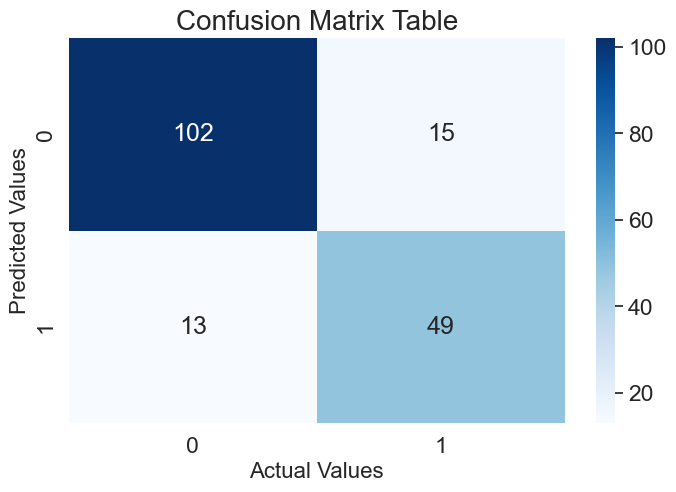

In [252]:
plt.subplots(figsize=(8,5))
sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Table', fontsize=20)
plt.xlabel('Actual Values', fontsize=16)
plt.ylabel('Predicted Values', fontsize=16)

plt.show()

### Precision

In [268]:
prec = precision_score(val_y, pred_values)
print("Precision for the model is:", prec*100)

Precision for the model is: 76.5625


### Recall

In [210]:
recall = recall_score(val_y, pred_values)
print("Recall score for the model is:", recall*100)

Recall score for the model is: 79.03225806451613


### F1-Score

In [270]:
f1_score = f1_score(val_y, pred_values)
print("F1-Score for the model is:", f1_score*100)

F1-Score for the model is: 77.77777777777779


### Plot the ROC curve

In [213]:
fpr, tpr, thresholds = roc_curve(val_y, pred_values)

In [215]:
fpr

array([0.        , 0.12820513, 1.        ])

In [217]:
tpr

array([0.        , 0.79032258, 1.        ])

In [219]:
thresholds

array([inf,  1.,  0.])

- Thresholds represent the decision boundary being used as binary classifier

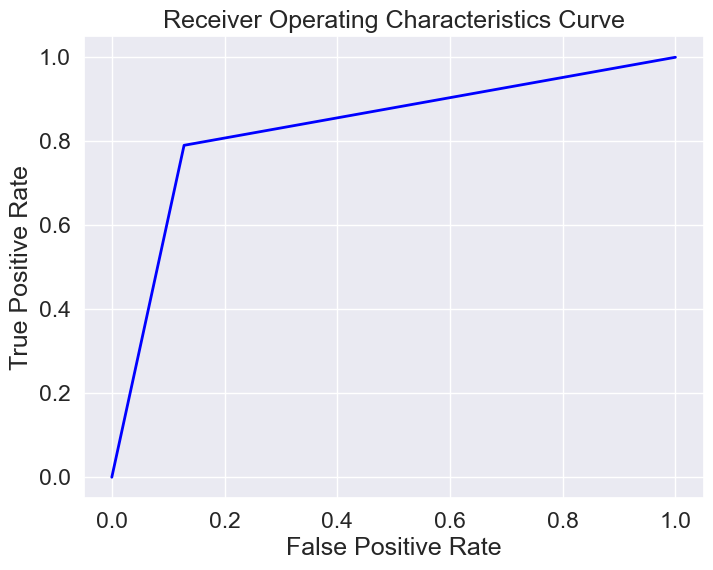

In [226]:
### Plotting the ROC curve
plt.subplots(figsize=(8,6))

plt.plot(fpr, tpr, color='blue', lw=2,label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics Curve')
plt.show()

### Classification Report

In [266]:
clrep = classification_report(val_y, pred_values)
print(clrep)

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       117
           1       0.77      0.79      0.78        62

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



# Conclusion
**The logistic regression model achieved the following performance metrics on the Titanic survival prediction task:**

- Accuracy: 84%
- Precision: 89% for non-survivors (class 0) and 77% for survivors (class 1).
- Recall: 87% for non-survivors and 79% for survivors.
- F1-Score: 88% for non-survivors and 78% for survivors.
  
These results demonstrate that the model performs well in identifying both survivors and non-survivors, with slightly better performance in predicting the majority class (non-survivors). The balanced precision and recall scores, reflected in the macro average F1-score of 83%, highlight the model's overall reliability in binary classification.